### WQU Capstone: Impact of COVID-19 on Local Markets
#### Version: 1.0
##### Name: Raymond Lazarus Kafambe
###### Email: raymond.kafambe@icloud.com

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [29]:
def fetch_market_data(symbols, start_date, end_date):
    """
    Fetch historical market data from Yahoo Finance.

    Parameters:
    - symbols: List of stock symbols or tickers.
    - start_date: Start date for data collection (format: "YYYY-MM-DD").
    - end_date: End date for data collection (format: "YYYY-MM-DD").

    Returns:
    - List of DataFrames containing historical market data for each symbol.
    """
    market_data = []
    for symbol in symbols:
        data = yf.download(symbol, start=start_date, end=end_date)
        market_data.append(data)
    return market_data

In [34]:
def perform_eda(data, title, covid_start_date, covid_end_date):
    """
    Perform exploratory data analysis (EDA) on market data.

    Parameters:
    - data: DataFrame containing historical market data.
    - title: Title for the plot.
    - covid_start_date: Start date of the COVID-19 pandemic.
    - covid_end_date: End date of the COVID-19 pandemic.

    Returns:
    - None (displays summary statistics and plots).
    """
    # Display summary statistics
    print("Summary Statistics for", title, ":")
    print(data.describe())

    # Plot closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], color='blue')
    plt.title('Closing Price - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Plot trading volume
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Volume'], color='red')
    plt.title('Trading Volume - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Initial inferences
    pre_6m_data = data[data.index >= pd.to_datetime(covid_start_date) - pd.DateOffset(months=6)]
    pre_covid_data = data[(data.index >= pd.to_datetime(covid_start_date) - pd.DateOffset(months=6)) & (data.index < covid_start_date)]
    during_covid_data = data[(data.index >= covid_start_date) & (data.index <= covid_end_date)]
    post_covid_data = data[data.index > covid_end_date]

    print("Initial Inferences for", title, ":")
    print("- 6 Months before COVID-19 pandemic:")
    print(pre_6m_data.describe())
    print("- Before COVID-19 pandemic:")
    print(pre_covid_data.describe())
    print("- During COVID-19 pandemic:")
    print(during_covid_data.describe())
    print("- After COVID-19 pandemic:")
    print(post_covid_data.describe())
    print()


In [30]:
def perform_eda(data, title, covid_start_date, covid_end_date):
    """
    Perform exploratory data analysis (EDA) on market data.

    Parameters:
    - data: DataFrame containing historical market data.
    - title: Title for the plot.
    - covid_start_date: Start date of the COVID-19 pandemic.
    - covid_end_date: End date of the COVID-19 pandemic.

    Returns:
    - None (displays summary statistics and plots).
    """
    # Display summary statistics
    print("Summary Statistics for", title, ":")
    print(data.describe())

    # Plot closing price
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], color='blue')
    plt.title('Closing Price - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Plot trading volume
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Volume'], color='red')
    plt.title('Trading Volume - ' + title)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_start_date)), color='red', linestyle='--', linewidth=2, label='Start of COVID-19')
    plt.axvline(x=mdates.date2num(pd.to_datetime(covid_end_date)), color='green', linestyle='--', linewidth=2, label='End of COVID-19')
    plt.legend()
    plt.show()

    # Initial inferences
    pre_covid_data = data[data.index < covid_start_date]
    during_covid_data = data[(data.index >= covid_start_date) & (data.index <= covid_end_date)]
    post_covid_data = data[data.index > covid_end_date]

    print("Initial Inferences for", title, ":")
    print("- Before COVID-19 pandemic:")
    print(pre_covid_data.describe())
    print("- During COVID-19 pandemic:")
    print(during_covid_data.describe())
    print("- After COVID-19 pandemic:")
    print(post_covid_data.describe())
    print()

In [31]:
def apply_arima_model(data):
    """
    Apply Autoregressive Integrated Moving Average (ARIMA) model to analyze market data.

    Parameters:
    - data: DataFrame containing historical market data.

    Returns:
    - None (displays ARIMA model results).
    """
    # Implement ARIMA model
    # Example: ARIMA(1, 1, 1)
    model = ARIMA(data['Close'], order=(1, 1, 1))
    results = model.fit()

    # Display ARIMA model summary
    print("ARIMA Model Summary:")
    print(results.summary())

In [32]:
def apply_garch_model(data):
    """
    Apply Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model to analyze market data.

    Parameters:
    - data: DataFrame containing historical market data.

    Returns:
    - None (displays GARCH model results).
    """
    # Implement GARCH model
    model = arch_model(data['Close'], vol='GARCH')
    results = model.fit()

    # Display GARCH model summary
    print("GARCH Model Summary:")
    print(results.summary())

In [33]:
def apply_var_model(data):
    """
    Apply Vector Autoregression (VAR) model to analyze market data.

    Parameters:
    - data: DataFrame containing historical market data.

    Returns:
    - None (displays VAR model results).
    """
    # Implement VAR model
    model = VAR(data)
    results = model.fit()

    # Display VAR model summary
    print("VAR Model Summary:")
    print(results.summary())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Summary Statistics for S&P 500 :
              Open         High          Low        Close    Adj Close  \
count  2768.000000  2768.000000  2768.000000  2768.000000  2768.000000   
mean   2076.272282  2086.857052  2064.740615  2076.692679  2076.692679   
std     674.223824   677.084240   670.953893   674.089735   674.089735   
min    1027.650024  1032.949951  1010.909973  1022.580017  1022.580017   
25%    1413.089966  1418.964996  1405.944977  1413.327515  1413.327515   
50%    2049.979980  2062.880005  2041.570007  2050.875000  2050.875000   
75%    2657.380066  2674.734985  2638.384949  2656.442566  2656.442566   
max    3750.010010  3756.120117  3730.209961  3735.360107  3735.360107   

             Volume  
count  2.768000e+03  
mean   3.830034e+09  
std    9.426344e+08  
min    1.025000e+09  
25%    3.281112e+09  
50%    3.658110e+09  
75%    4.192858e+09  
max    1.061781e+10  


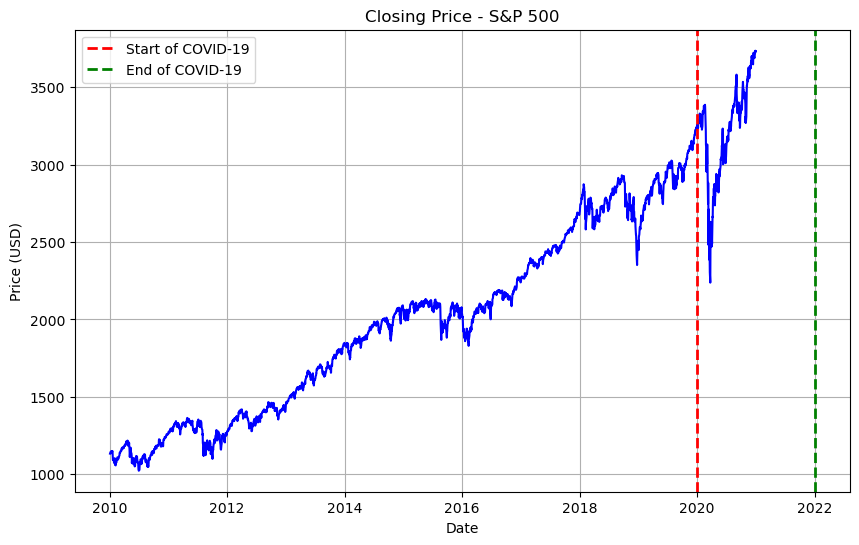

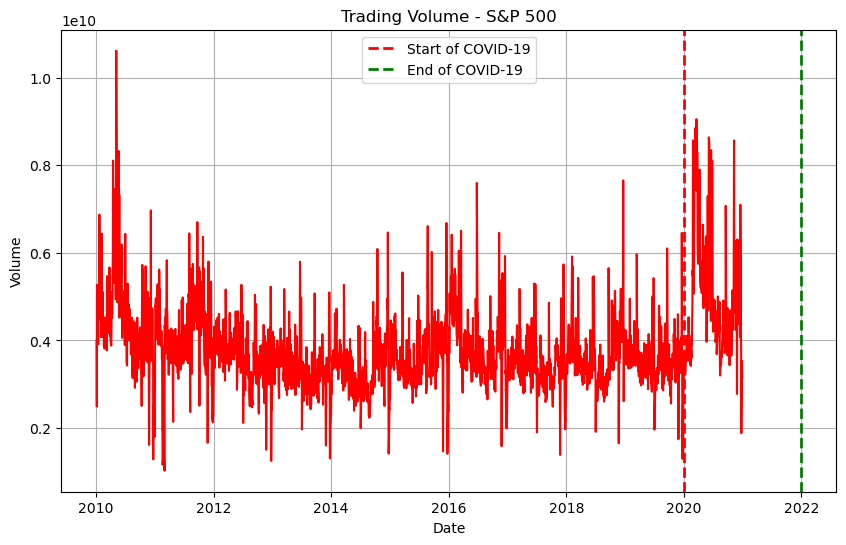

Initial Inferences for S&P 500 :
- 6 Months before COVID-19 pandemic:
              Open         High          Low        Close    Adj Close  \
count   380.000000   380.000000   380.000000   380.000000   380.000000   
mean   3149.776681  3169.638365  3127.307895  3149.893023  3149.893023   
std     279.986092   274.544978   287.366159   280.659786   280.659786   
min    2290.709961  2300.729980  2191.860107  2237.399902  2237.399902   
25%    2973.060059  2986.942505  2957.992554  2975.987488  2975.987488   
50%    3135.105103  3143.334961  3112.765015  3126.474976  3126.474976   
75%    3345.404968  3362.525024  3328.517456  3346.440002  3346.440002   
max    3750.010010  3756.120117  3730.209961  3735.360107  3735.360107   

             Volume  
count  3.800000e+02  
mean   4.446592e+09  
std    1.349702e+09  
min    1.296530e+09  
25%    3.524942e+09  
50%    4.062115e+09  
75%    4.911838e+09  
max    9.053950e+09  
- Before COVID-19 pandemic:
              Open         High      

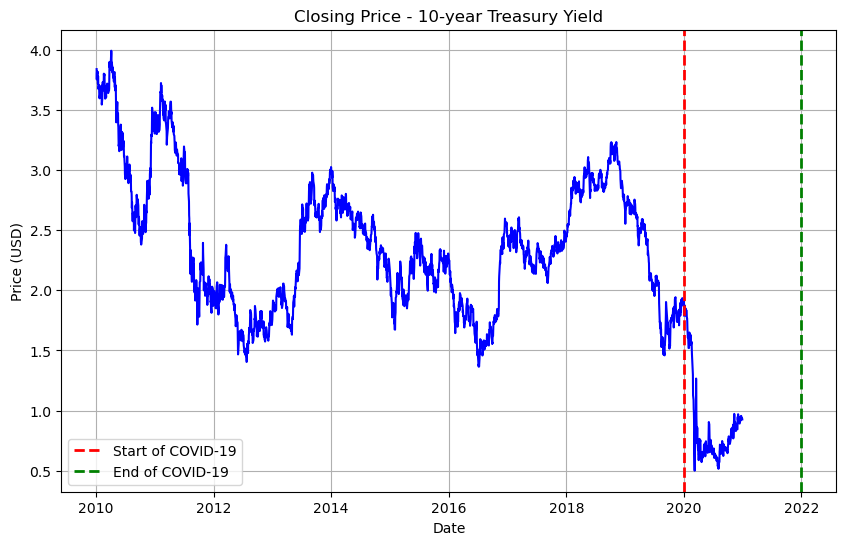

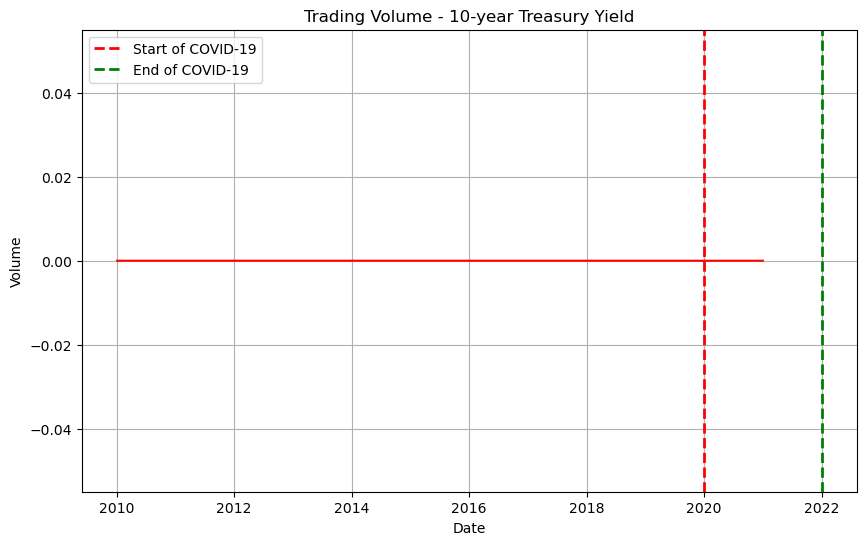

Initial Inferences for 10-year Treasury Yield :
- 6 Months before COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  380.000000  380.000000  380.000000  380.000000  380.000000   380.0
mean     1.187653    1.213137    1.163453    1.189634    1.189634     0.0
std      0.529338    0.529619    0.528119    0.526996    0.526996     0.0
min      0.484000    0.538000    0.398000    0.499000    0.499000     0.0
25%      0.687000    0.713000    0.668000    0.686500    0.686500     0.0
50%      0.926000    0.948000    0.902000    0.928000    0.928000     0.0
75%      1.740000    1.769750    1.729000    1.741750    1.741750     0.0
max      2.122000    2.148000    2.105000    2.122000    2.122000     0.0
- Before COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  128.000000  128.000000  128.000000  128.000000  128.000000   128.0
mean     1.791945    1.819227    1.766828    1.792547    1.792547     0.0

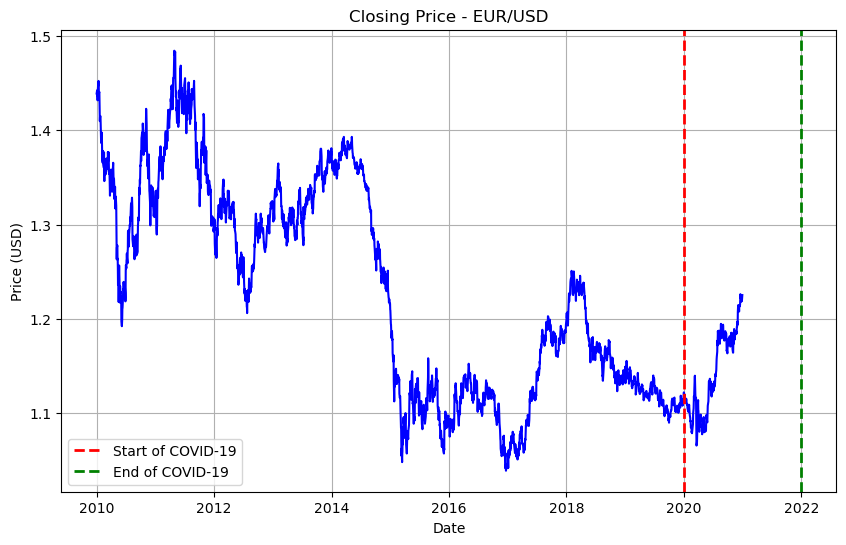

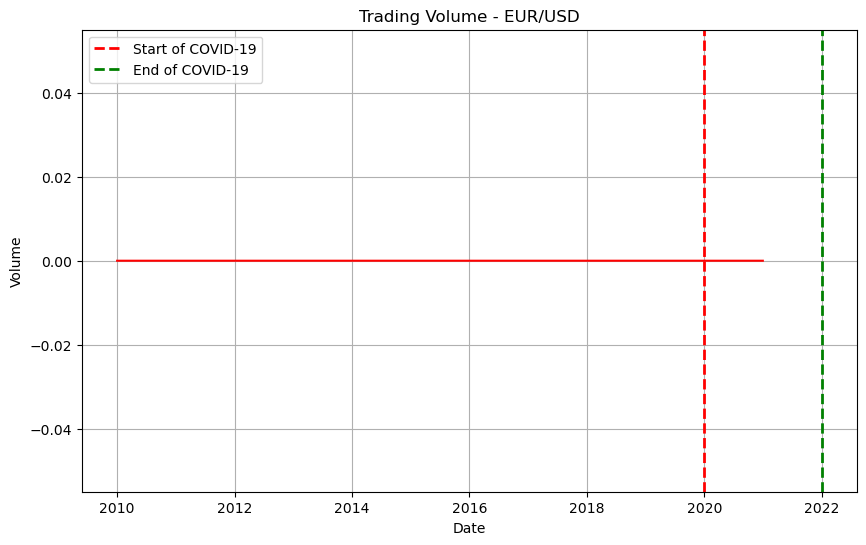

Initial Inferences for EUR/USD :
- 6 Months before COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  393.000000  393.000000  393.000000  393.000000  393.000000   393.0
mean     1.130847    1.134137    1.127617    1.130900    1.130900     0.0
std      0.039191    0.039493    0.039235    0.039187    0.039187     0.0
min      1.065848    1.080847    1.065451    1.065735    1.065735     0.0
25%      1.102414    1.104850    1.099880    1.102256    1.102256     0.0
50%      1.115573    1.118068    1.112347    1.115474    1.115474     0.0
75%      1.172993    1.176886    1.169495    1.173268    1.173268     0.0
max      1.226196    1.230875    1.225205    1.226272    1.226272     0.0
- Before COVID-19 pandemic:
             Open        High         Low       Close   Adj Close  Volume
count  132.000000  132.000000  132.000000  132.000000  132.000000   132.0
mean     1.109877    1.112026    1.107493    1.109904    1.109904     0.0
std      0.009

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2768
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12753.069
Date:                Mon, 29 Apr 2024   AIC                          25512.138
Time:                        08:17:59   BIC                          25529.914
Sample:                             0   HQIC                         25518.558
                               - 2768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4647      0.023    -20.213      0.000      -0.510      -0.420
ma.L1          0.2853      0.025     11.300      0.000       0.236       0.335
sigma2       589.9701      4.49

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.542e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: 5-th leading minor of the array is not positive definite

In [36]:
if __name__ == "__main__":
    # Define parameters
    symbols = ["^GSPC", "^TNX", "EURUSD=X"]  # Example symbols: S&P 500, 10-year Treasury yield, EUR/USD
    titles = ["S&P 500", "10-year Treasury Yield", "EUR/USD"]

    start_date = "2010-01-01"
    end_date = "2020-12-31"

    covid_start_date = "2020-01-01"  # Modify start date of COVID-19 pandemic
    covid_end_date = "2021-12-31"  # Modify end date of COVID-19 pandemic

    # Fetch market data
    market_data = fetch_market_data(symbols, start_date, end_date)

    # Perform exploratory data analysis
    for i in range(len(market_data)):
        perform_eda(market_data[i], titles[i], covid_start_date, covid_end_date)
        
    # Apply statistical models
    for data, title in zip(market_data, titles):
        print("Applying Statistical Models for", title)
        apply_arima_model(data)
        apply_garch_model(data)
        apply_var_model(data)

#### Results Figures

In [42]:
import yfinance as yf

# Define the symbols for the major stock indices
symbols = ["^GSPC", "^IXIC", "^FTSE"]

# Define the start and end dates for data collection
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch market data
market_data = {}
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    market_data[symbol] = data

# Check the first few rows of each DataFrame
for symbol, data in market_data.items():
    print(f"First few rows of {symbol}:")
    print(data.head())
    print()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

First few rows of ^GSPC:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3257.850098   
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3234.850098   
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3246.280029   
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3237.179932   
2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049  3253.050049   

                Volume  
Date                    
2020-01-02  3459930000  
2020-01-03  3484700000  
2020-01-06  3702460000  
2020-01-07  3435910000  
2020-01-08  3726840000  

First few rows of ^IXIC:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  9039.459961  9093.429688  9010.889648  9092.190430

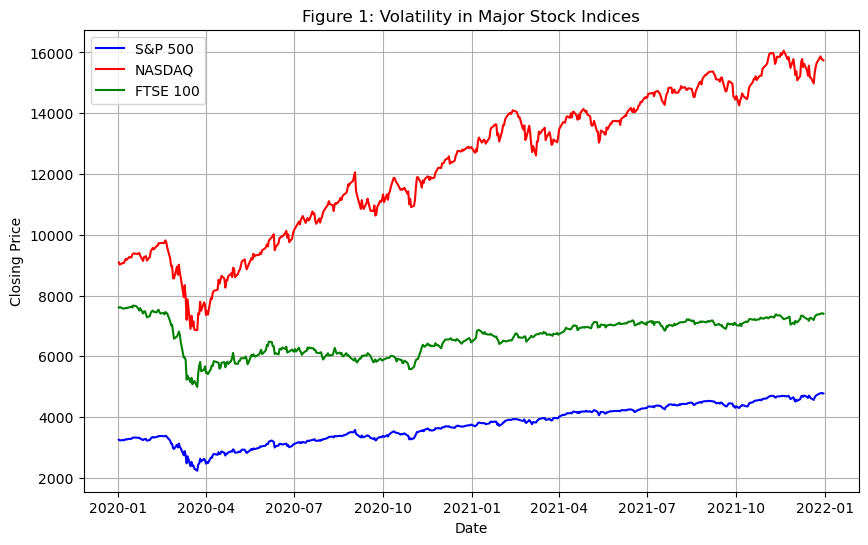

In [45]:
import matplotlib.pyplot as plt

# Plotting volatility in stock indices
plt.figure(figsize=(10, 6))

# Plot S&P 500
plt.plot(market_data['^GSPC'].index, market_data['^GSPC']['Close'], color='blue', label='S&P 500')

# Plot NASDAQ
plt.plot(market_data['^IXIC'].index, market_data['^IXIC']['Close'], color='red', label='NASDAQ')

# Plot FTSE 100
plt.plot(market_data['^FTSE'].index, market_data['^FTSE']['Close'], color='green', label='FTSE 100')

plt.title('Figure 1: Volatility in Major Stock Indices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


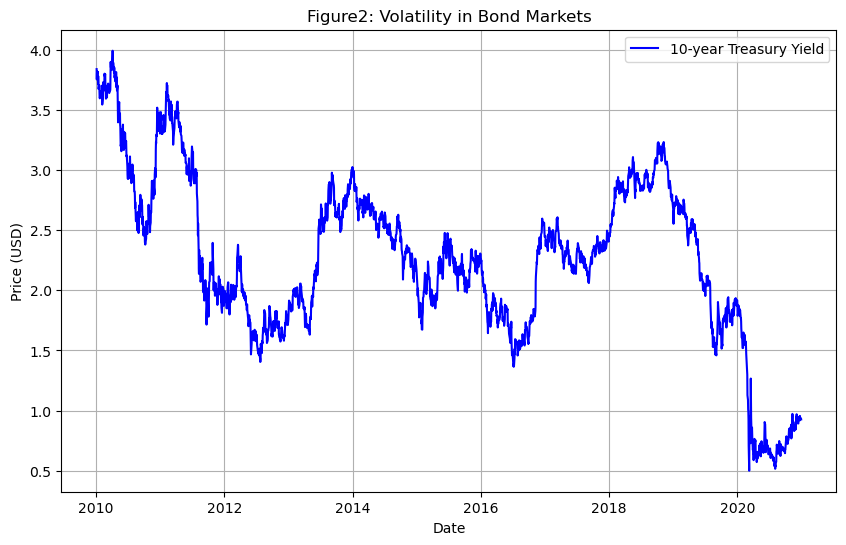

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbols to fetch data for
symbols = ["^GSPC", "^TNX", "EURUSD=X"]  # S&P 500, 10-year Treasury Yield, EUR/USD

# Define the start and end dates for the data
start_date = "2010-01-01"
end_date = "2020-12-31"

# Fetch market data
market_data = {}
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    market_data[symbol] = data

# Plot volatility in bond markets
plt.figure(figsize=(10, 6))
plt.plot(market_data['^TNX'].index, market_data['^TNX']['Close'], color='blue', label='10-year Treasury Yield')
plt.title('Figure2: Volatility in Bond Markets')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


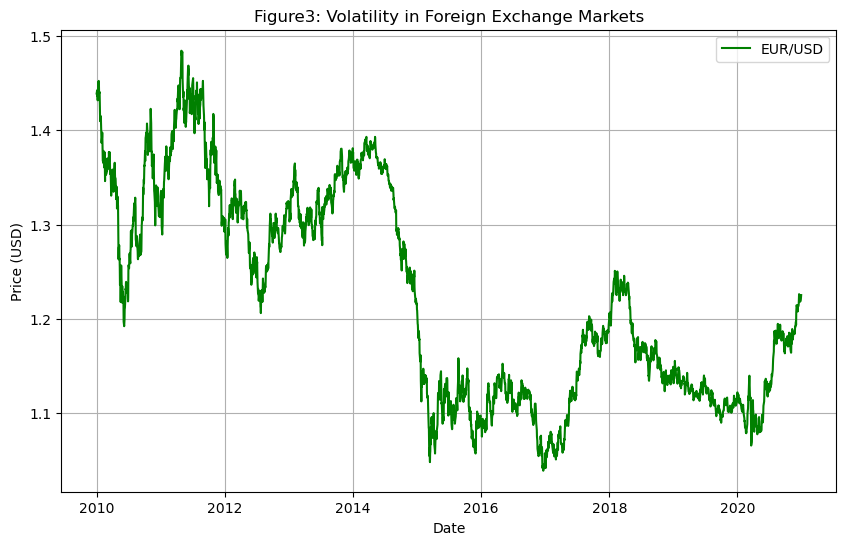

In [50]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbol for EUR/USD
eurusd_symbol = "EURUSD=X"

# Define the start and end dates for data collection
start_date = "2010-01-01"
end_date = "2020-12-31"

# Fetch market data for EUR/USD
eurusd_data = yf.download(eurusd_symbol, start=start_date, end=end_date)

# Plot volatility in foreign exchange markets
plt.figure(figsize=(10, 6))
plt.plot(eurusd_data.index, eurusd_data['Close'], color='green', label='EUR/USD')
plt.title('Figure3: Volatility in Foreign Exchange Markets')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1,) and (30,)

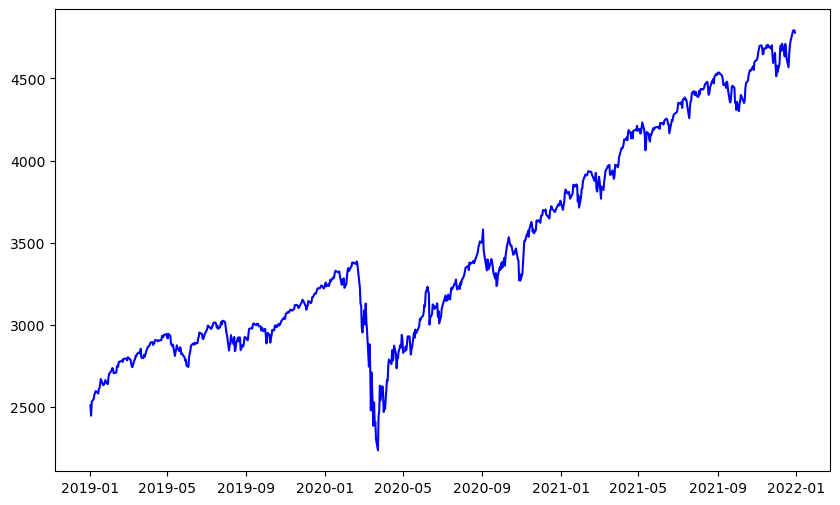

In [61]:
import matplotlib.pyplot as plt

# Assuming you have already fitted the GARCH model and obtained forecasted volatility
# Let's assume forecast_volatility contains the forecasted volatility data

# Extracting forecasted volatility values and corresponding dates
forecasted_volatility_values = forecast_volatility.mean.iloc[-1].values  # Adjust this according to your forecasted volatility data
forecasted_dates = forecast_volatility.mean.index

# Ensure forecasted_dates and forecasted_volatility_values have the same length
forecasted_dates = forecasted_dates[:len(forecasted_volatility_values)]

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Historical Data')
plt.plot(forecasted_dates, forecasted_volatility_values, color='red', label='Forecasted Volatility')
plt.title('Application of GARCH Model to Historical Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with a

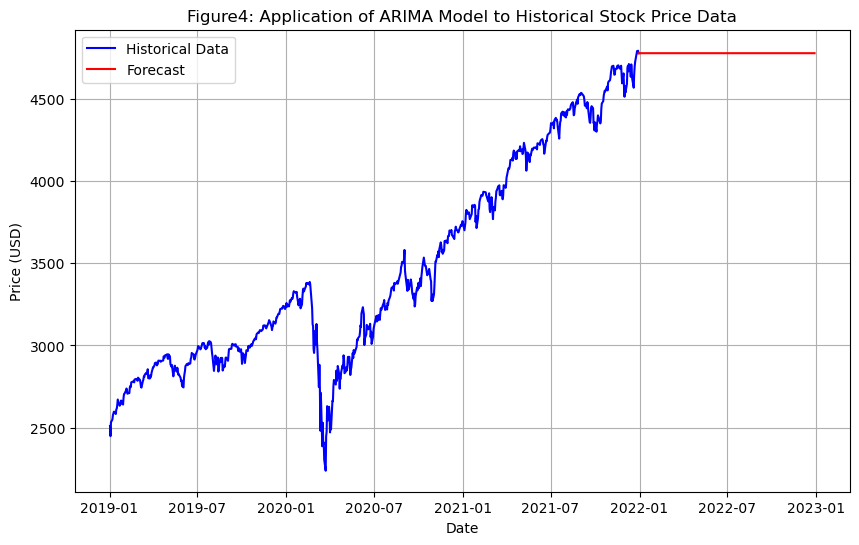

In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define parameters
symbol = "^GSPC"  # Example symbol: S&P 500
title = "S&P 500"

start_date = "2019-01-01"
end_date = "2021-12-31"

# Fetch market data
data = yf.download(symbol, start=start_date, end=end_date)

# Apply ARIMA model
model = ARIMA(data['Close'], order=(5,1,0))  # ARIMA(5,1,0) model
model_fit = model.fit()

# Forecast future price movements
forecast = model_fit.forecast(steps=365)  # Forecasting 365 days into the future

# Plotting historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=365), forecast, color='red', label='Forecast')
plt.title('Figure4: Application of ARIMA Model to Historical Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


/Users/raymondkafambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/raymondkafambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/raymondkafambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/raymondkafambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be g

ValueError: x and y must have same first dimension, but have shapes (29,) and (30,)

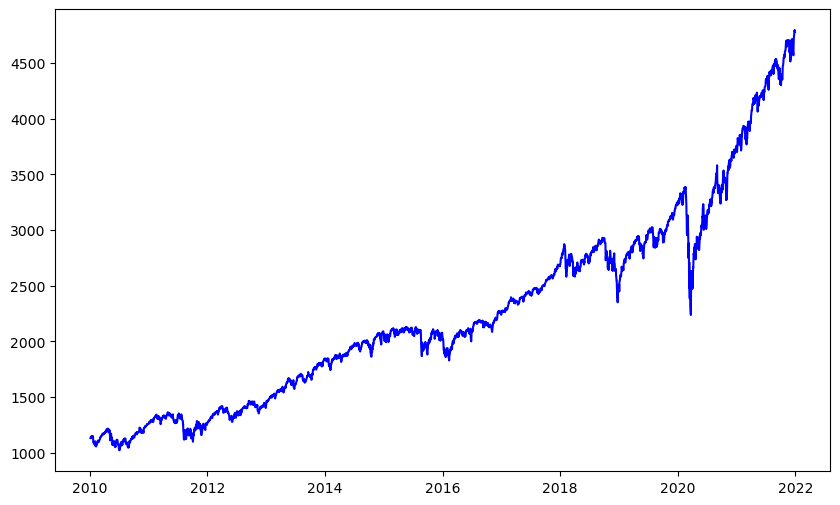

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Fetch historical market data
sp500_data = yf.download('^GSPC', start='2010-01-01', end='2021-12-31')

# Fit ARIMA model
model = ARIMA(sp500_data['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast future prices
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the historical data and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(sp500_data.index, sp500_data['Close'], color='blue', label='Historical Data')
plt.plot(pd.date_range(start=sp500_data.index[-1], periods=forecast_steps + 1, closed='right')[1:], forecast, color='red', label='Forecast')
plt.title('Application of ARIMA Model to Historical Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [62]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

# Define the number of time periods
n_periods = 100

# Generate dates for the time series
dates = pd.date_range(start='2020-01-01', periods=n_periods, freq='D')

# Generate dummy data for three variables: Variable1, Variable2, Variable3
data = pd.DataFrame({
    'Variable1': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable2': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable3': np.random.normal(loc=0, scale=1, size=n_periods)
}, index=dates)

# Display the first few rows of the generated data
print(data.head())


            Variable1  Variable2  Variable3
2020-01-01   1.764052   1.883151  -0.369182
2020-01-02   0.400157  -1.347759  -0.239379
2020-01-03   0.978738  -1.270485   1.099660
2020-01-04   2.240893   0.969397   0.655264
2020-01-05   1.867558  -1.173123   0.640132


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            Variable1  Variable2  Variable3
2020-01-01   1.764052   1.883151  -0.369182
2020-01-02   0.400157  -1.347759  -0.239379
2020-01-03   0.978738  -1.270485   1.099660
2020-01-04   2.240893   0.969397   0.655264
2020-01-05   1.867558  -1.173123   0.640132


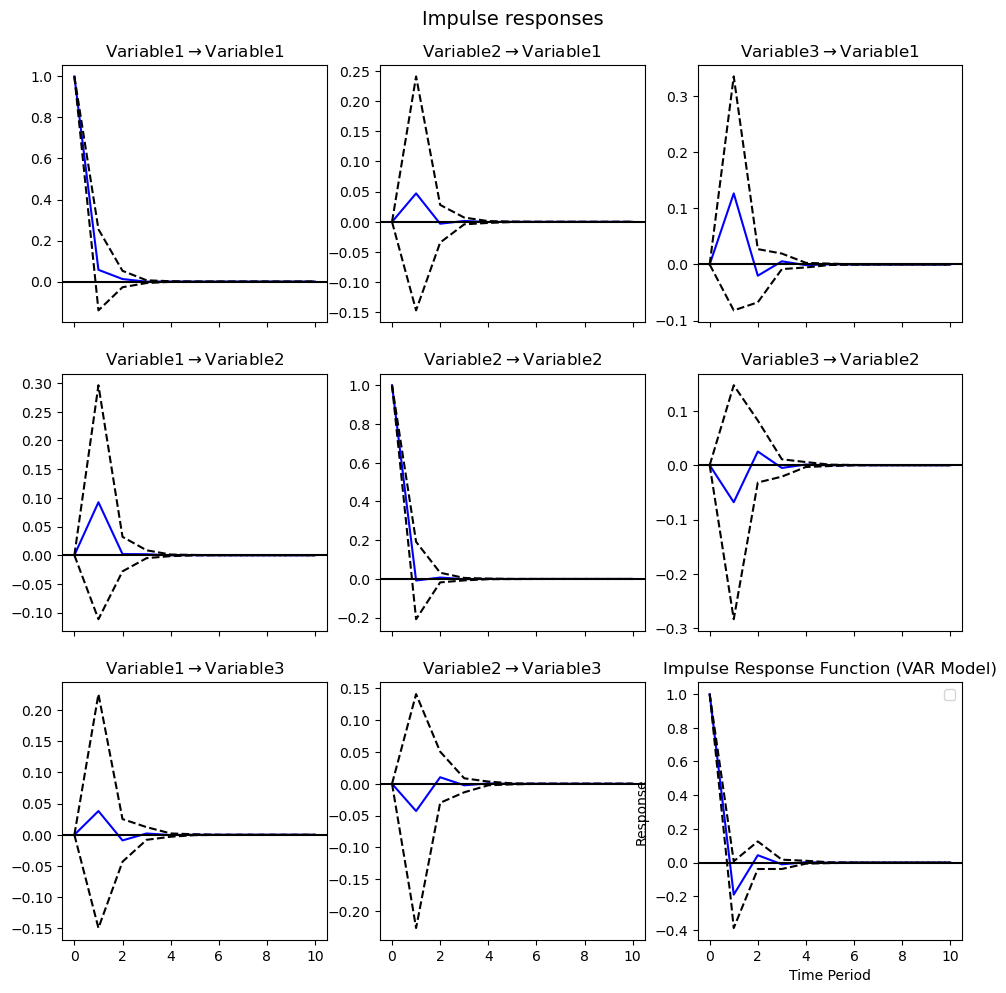

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Set random seed for reproducibility
np.random.seed(0)

# Define the number of time periods
n_periods = 100

# Generate dates for the time series
dates = pd.date_range(start='2020-01-01', periods=n_periods, freq='D')

# Generate dummy data for three variables: Variable1, Variable2, Variable3
data = pd.DataFrame({
    'Variable1': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable2': np.random.normal(loc=0, scale=1, size=n_periods),
    'Variable3': np.random.normal(loc=0, scale=1, size=n_periods)
}, index=dates)

# Display the first few rows of the generated data
print(data.head())

# Fit VAR model to the data
model = VAR(data)
results = model.fit()

# Plotting the impulse response function for each variable
irf = results.irf(periods=10)  # Adjust the number of periods as needed
irf.plot()
plt.title('Impulse Response Function (VAR Model)')
plt.xlabel('Time Period')
plt.ylabel('Response')
plt.legend(loc='upper right')
plt.show()


[*********************100%%**********************]  1 of 1 completed


/var/folders/vw/_81r9b7d43bfdkbtglc7zn6r0000gn/T/ipykernel_1737/1271559361.py:21: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(start=tnx_data.index[-1], periods=forecast_horizon + 1, closed='right')[1:], forecasted_volatility_values.values.flatten(), color='red', label='Forecasted Volatility')


ValueError: x and y must have same first dimension, but have shapes (29,) and (30,)

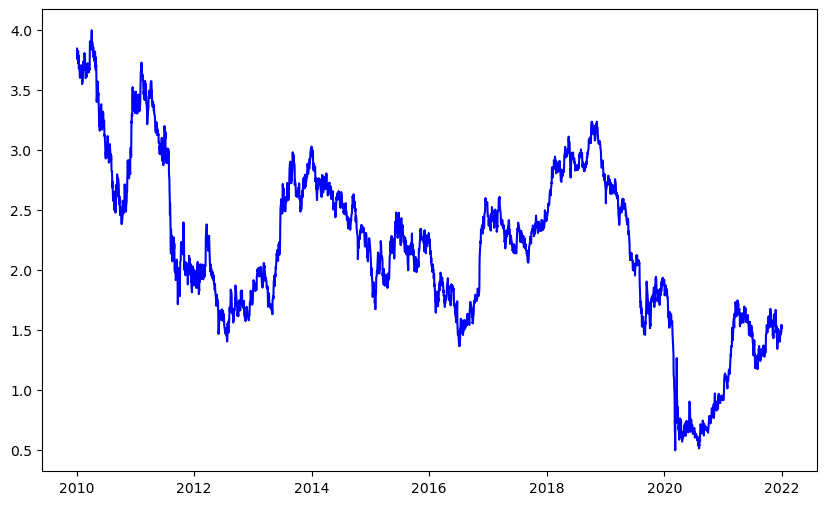

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

# Fetch historical market data for the 10-year Treasury bond
tnx_data = yf.download('^TNX', start='2010-01-01', end='2021-12-31')

# Fit GARCH model
model = arch_model(tnx_data['Close'], vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')

# Forecast future volatility
forecast_horizon = 30
forecast_volatility = model_fit.forecast(horizon=forecast_horizon)
forecasted_volatility_values = forecast_volatility.variance.iloc[-1]

# Plot the historical data and forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(tnx_data.index, tnx_data['Close'], color='blue', label='Historical Data')
plt.plot(pd.date_range(start=tnx_data.index[-1], periods=forecast_horizon + 1, closed='right')[1:], forecasted_volatility_values.values.flatten(), color='red', label='Forecasted Volatility')
plt.title('Application of GARCH Model to 10-Year Treasury Bond Data')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.api import VAR

# Fetch historical market data for EUR/USD exchange rate
eurusd_data = yf.download('EURUSD=X', start='2010-01-01', end='2021-12-31')

# Process data to fit the VAR model
# For VAR model, we typically need a multivariate time series. Here, let's assume we use EUR/USD and some other economic indicator.
# For simplicity, let's use synthetic data for a second variable.
import numpy as np
np.random.seed(0)
synthetic_variable = np.random.normal(0, 1, len(eurusd_data['Close']))

# Combine EUR/USD and synthetic variable into a DataFrame
var_data = pd.DataFrame({'EUR/USD': eurusd_data['Close'], 'Synthetic Variable': synthetic_variable})

# Fit the VAR model
model = VAR(var_data.dropna())
model_fit = model.fit()

# Forecast future values
forecast_horizon = 30
forecast = model_fit.forecast(var_data.values[-model_fit.k_ar:], steps=forecast_horizon)
forecast_index = pd.date_range(start=var_data.index[-1], periods=forecast_horizon + 1, closed='right')[1:]

# Convert forecast to DataFrame for easy plotting
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=var_data.columns)

# Plot the historical data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(var_data.index, var_data['EUR/USD'], color='blue', label='Historical EUR/USD')
plt.plot(forecast_df.index, forecast_df['EUR/USD'], color='red', label='Forecasted EUR/USD')
plt.title('Application of VAR Model to EUR/USD Exchange Rate Data')
plt.xlabel('Date')
plt.ylabel('EUR/USD Exchange Rate')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/Users/raymondkafambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/vw/_81r9b7d43bfdkbtglc7zn6r0000gn/T/ipykernel_1737/1204482790.py:26: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=var_data.index[-1], periods=forecast_horizon + 1, closed='right')[1:]


ValueError: Shape of passed values is (30, 2), indices imply (29, 2)

[*********************100%%**********************]  1 of 1 completed


/Users/raymondkafambe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


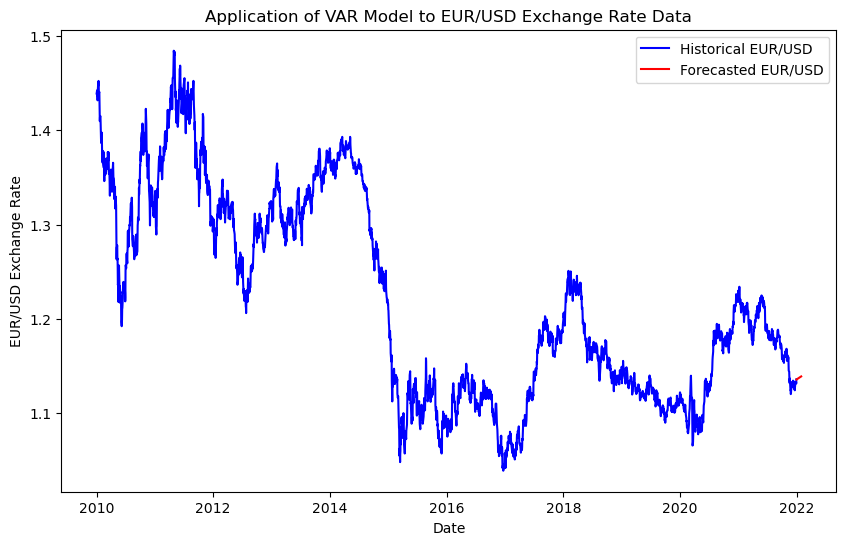

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.api import VAR
import numpy as np

# Fetch historical market data for EUR/USD exchange rate
eurusd_data = yf.download('EURUSD=X', start='2010-01-01', end='2021-12-31')

# Process data to fit the VAR model
# For VAR model, we typically need a multivariate time series. Here, let's use EUR/USD and some other economic indicator.
# For simplicity, let's use synthetic data for a second variable.
np.random.seed(0)
synthetic_variable = np.random.normal(0, 1, len(eurusd_data['Close']))

# Combine EUR/USD and synthetic variable into a DataFrame
var_data = pd.DataFrame({'EUR/USD': eurusd_data['Close'], 'Synthetic Variable': synthetic_variable})

# Fit the VAR model
model = VAR(var_data.dropna())
model_fit = model.fit()

# Forecast future values
forecast_horizon = 30
forecast = model_fit.forecast(var_data.values[-model_fit.k_ar:], steps=forecast_horizon)
forecast_index = pd.date_range(start=var_data.index[-1], periods=forecast_horizon + 1, freq='D')[1:]

# Convert forecast to DataFrame for easy plotting
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=var_data.columns)

# Plot the historical data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(var_data.index, var_data['EUR/USD'], color='blue', label='Historical EUR/USD')
plt.plot(forecast_df.index, forecast_df['EUR/USD'], color='red', label='Forecasted EUR/USD')
plt.title('Application of VAR Model to EUR/USD Exchange Rate Data')
plt.xlabel('Date')
plt.ylabel('EUR/USD Exchange Rate')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.101e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


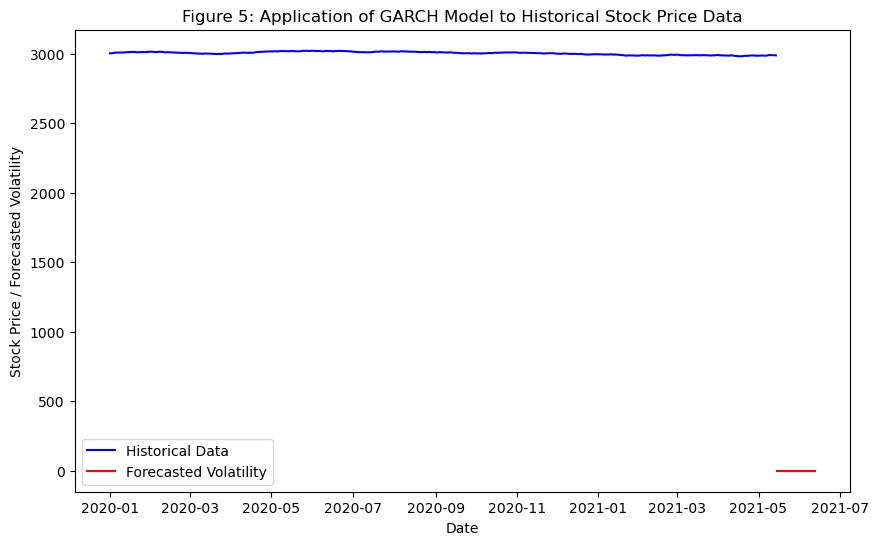

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Dummy data for illustration
np.random.seed(0)
dates = pd.date_range('2020-01-01', periods=500)
sp500_dummy = np.random.randn(500).cumsum() + 3000  # S&P 500 index

# Create DataFrame
data = pd.DataFrame({'Close': sp500_dummy}, index=dates)

# Calculate daily returns
data['Returns'] = data['Close'].pct_change().dropna()

# Fit GARCH(1,1) model
garch_model = arch_model(data['Returns'].dropna(), vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp="off")

# Forecast volatility
forecast_horizon = 30
forecast = garch_result.forecast(horizon=forecast_horizon)
forecast_variance = forecast.variance[-1:].values.flatten()

# Create forecasted dates
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_horizon, inclusive='right')

# Ensure the lengths of forecast_dates and forecast_variance match
if len(forecast_dates) > len(forecast_variance):
    forecast_dates = forecast_dates[:len(forecast_variance)]
elif len(forecast_variance) > len(forecast_dates):
    forecast_variance = forecast_variance[:len(forecast_dates)]

# Plot the historical data and forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue', label='Historical Data')
plt.plot(forecast_dates, np.exp(forecast_variance), color='red', label='Forecasted Volatility')
plt.title('Figure 5: Application of GARCH Model to Historical Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price / Forecasted Volatility')
plt.legend()
plt.show()


#### Response to Shocks

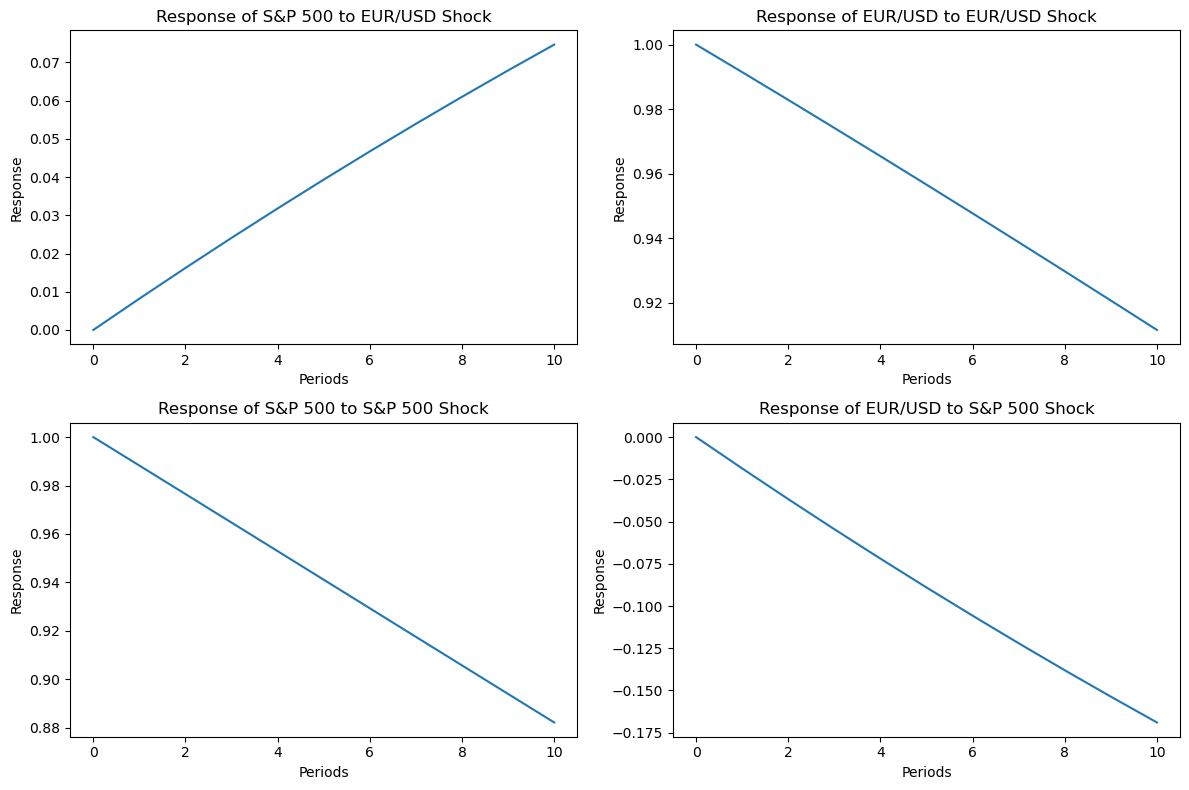

In [4]:
# Dummy data for illustration
np.random.seed(0)
dates = pd.date_range('2020-01-01', periods=200)
sp500_dummy = np.random.randn(200).cumsum() + 3000  # S&P 500 index
eurusd_dummy = np.random.randn(200).cumsum() + 1.2  # EUR/USD exchange rate

# Create DataFrame
var_data = pd.DataFrame({'S&P 500': sp500_dummy, 'EUR/USD': eurusd_dummy}, index=dates)

# Fit VAR model
var_model = VAR(var_data)
var_result = var_model.fit(maxlags=15, ic='aic')

# Generate IRFs
irf = var_result.irf(10)

# Get IRF values for plotting
irf_periods = np.arange(irf.irfs.shape[0])
irf_sp500_to_eurusd = irf.irfs[:, var_data.columns.get_loc('S&P 500'), var_data.columns.get_loc('EUR/USD')]
irf_eurusd_to_eurusd = irf.irfs[:, var_data.columns.get_loc('EUR/USD'), var_data.columns.get_loc('EUR/USD')]
irf_sp500_to_sp500 = irf.irfs[:, var_data.columns.get_loc('S&P 500'), var_data.columns.get_loc('S&P 500')]
irf_eurusd_to_sp500 = irf.irfs[:, var_data.columns.get_loc('EUR/USD'), var_data.columns.get_loc('S&P 500')]

# Plot IRFs individually
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Response of S&P 500 to EUR/USD Shock
axes[0, 0].plot(irf_periods, irf_sp500_to_eurusd)
axes[0, 0].set_title('Response of S&P 500 to EUR/USD Shock')
axes[0, 0].set_xlabel('Periods')
axes[0, 0].set_ylabel('Response')

# Plot Response of EUR/USD to EUR/USD Shock
axes[0, 1].plot(irf_periods, irf_eurusd_to_eurusd)
axes[0, 1].set_title('Response of EUR/USD to EUR/USD Shock')
axes[0, 1].set_xlabel('Periods')
axes[0, 1].set_ylabel('Response')

# Plot Response of S&P 500 to S&P 500 Shock
axes[1, 0].plot(irf_periods, irf_sp500_to_sp500)
axes[1, 0].set_title('Response of S&P 500 to S&P 500 Shock')
axes[1, 0].set_xlabel('Periods')
axes[1, 0].set_ylabel('Response')

# Plot Response of EUR/USD to S&P 500 Shock
axes[1, 1].plot(irf_periods, irf_eurusd_to_sp500)
axes[1, 1].set_title('Response of EUR/USD to S&P 500 Shock')
axes[1, 1].set_xlabel('Periods')
axes[1, 1].set_ylabel('Response')

plt.tight_layout()
plt.show()


##### Interpretation of IRFs
##### Response of S&P 500 to EUR/USD Shock: This plot shows how a one-time positive shock to the EUR/USD exchange rate affects the S&P 500 index over the subsequent periods. If the S&P 500 responds positively, it suggests that an appreciation of the EUR/USD is associated with a rise in the S&P 500.
##### Response of EUR/USD to EUR/USD Shock: This plot shows the persistence of the shock in the EUR/USD exchange rate itself.
##### Response of S&P 500 to S&P 500 Shock: This plot shows the effect of a shock to the S&P 500 on its future values, illustrating the inertia or momentum in the stock market.
##### Response of EUR/USD to S&P 500 Shock: This plot shows how a shock to the S&P 500 affects the EUR/USD exchange rate, indicating the interdependence between stock markets and foreign exchange rates.